# MASTER - Notebook 1
### Matteo Grazioso 884055

In [334]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

import myfunctions as mf # Custom functions

In [335]:
# Disply all columns and all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [336]:
# Find all txt files in the data folder
txt_files = mf.find_txt_files("data/raw")

# Choose a dataset from the list of txt files
selected_dataset = mf.choose_dataset(txt_files)

if selected_dataset:
    print(f"You selected the dataset {selected_dataset}")
else:
    print("No dataset selected.")

path  = selected_dataset

The following TXT files were found:
1. data/raw/Export.txt
2. data/raw/2-esportazioneCompleta.txt
3. data/raw/1-validazioni.txt
4. data/raw/3-esportazionePasqua23.txt
You selected the dataset data/raw/Export.txt


In [337]:
# The file contain the data of the validation of tickets in the city of public transport of Venice.

# Import the data into a dataframe of a txt file 
# path = 'data/raw/1-validazioni.txt'                     # Period: 2022-05-13 to 2022-07-15
# path = 'data/raw/2-esportazioneCompleta.txt'            # Period: 2023-01-23 to 2023-03-14
# path = 'data/raw/3-esportazionePasqua23.txt'            # Period: 2023-04-04 to 2023-06-03

df = pd.read_csv(path, header=0, sep='\t')
# Save the name of the file in a variable for future use extracting the name of the file from the path
file_name = path.split('/')[-1].split('.')[0]
# Remove the number and the - character from the head of the file name
file_name = file_name [file_name.find('-')+1:]


In [338]:
file_name

'Export'

In [339]:
# Check the first 5 rows of the data
df.head()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,11/09/2018 00:01,65676329393943813,1392,Santa Chiara,12101,Bigl.Aut.75'Mestre/Lido-tsc
1,11/09/2018 00:01,36412970881802500,5003,Lido (S.M.E.,11109,Biglietto 72 ore Roll. Venice
2,11/09/2018 00:01,36412970881806084,5003,Lido (S.M.E.,11107,"48h-Tpl 24,90-ComVe5,10"
3,11/09/2018 00:01,36412970881805828,5003,Lido (S.M.E.,11107,"48h-Tpl 24,90-ComVe5,10"
4,11/09/2018 00:01,65676744198028549,5013,S. Zaccaria,11107,"48h-Tpl 24,90-ComVe5,10"


In [340]:
# Check the last 5 rows of the data
df.tail()

,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
4876773,11/11/2018 23:56,36120397166597124,5038,"Rialto ""D""",11149,"7gg-Tpl 43,60-ComVe16,40"
4876774,11/11/2018 23:59,65676690164248581,5049,Zattere SX,11109,Biglietto 72 ore Roll. Venice
4876775,12/11/2018 00:53,36088796950622980,510,CORSIA A5,200,bordo multip BUS urb. autisti
4876776,12/11/2018 00:53,36088796950754052,510,CORSIA A5,200,bordo multip BUS urb. autisti
4876777,12/11/2018 02:48,36088796951081732,510,CORSIA A5,200,bordo multip BUS urb. autisti


In [341]:
# Create a subset of the data with the first 10% of the rows and the last 10% of the rows
# df = df.iloc[:int(len(df)*0.1),:]
# df = df.append(df.iloc[-int(len(df)*0.1):,:])


## Explorative Data Analysis


In [342]:
# Dates and hour of the validation of the ticket are in the same column 'DATA_VALIDAZIONE'
# Split the column 'DATA_VALIDAZIONE' into two columns 'DATA' and 'ORA' and convert them to datetime format
df.insert(0, 'DATA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[0], format='%d/%m/%Y'))
df.insert(1, 'ORA', pd.to_datetime(df['DATA_VALIDAZIONE'].str.split(' ').str[1], format='%H:%M').dt.time)

# Drop the column 'DATA_VALIDAZIONE'
# df.drop('DATA_VALIDAZIONE', axis=1, inplace=True)

# Display the first 5 rows of the dataframe
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,DESCRIZIONE_TITOLO
0,2018-09-11,00:01:00,11/09/2018 00:01,65676329393943813,1392,Santa Chiara,12101,Bigl.Aut.75'Mestre/Lido-tsc
1,2018-09-11,00:01:00,11/09/2018 00:01,36412970881802500,5003,Lido (S.M.E.,11109,Biglietto 72 ore Roll. Venice
2,2018-09-11,00:01:00,11/09/2018 00:01,36412970881806084,5003,Lido (S.M.E.,11107,"48h-Tpl 24,90-ComVe5,10"
3,2018-09-11,00:01:00,11/09/2018 00:01,36412970881805828,5003,Lido (S.M.E.,11107,"48h-Tpl 24,90-ComVe5,10"
4,2018-09-11,00:01:00,11/09/2018 00:01,65676744198028549,5013,S. Zaccaria,11107,"48h-Tpl 24,90-ComVe5,10"


In [343]:
# Set the format of the timestamp
df['DATA_VALIDAZIONE'] = pd.to_datetime(df['DATA_VALIDAZIONE'], format='%d/%m/%Y %H:%M')

In [344]:
# Print the date of the first and last validation using both data and hour
print('First validation: ', df['DATA'].min(), df['ORA'].min())
print('Last validation: ', df['DATA'].max(), df['ORA'].max())

# Print the number of Serial numbers
print('Number of Serial numbers: ', df['SERIALE'].nunique())

# Print the number of validation (rows)
print('Number of validation: ', df.shape[0])

# Print the number of tickets
print('Number of tickets: ', df['DESCRIZIONE_TITOLO'].nunique())
# Print the number of titolo
print('Number of titolo: ', df['TITOLO'].nunique())
# TODO: why the number of unique TITOLO is different from the number of DESCRIZIONE_TITOLO?

# Print the number of FERMATA
print('Number of FERMATA: ', df['FERMATA'].nunique())
# Print the number of DESCRIZIONE
print('Number of DESCRIZIONE: ', df['DESCRIZIONE'].nunique())
# TODO: why the number of unique DESCRIZIONE is different from the number of FERMATA?

First validation:  2018-09-11 00:00:00 00:00:00
Last validation:  2018-11-12 00:00:00 23:59:00
Number of Serial numbers:  1751985
Number of validation:  4876778
Number of tickets:  161
Number of titolo:  163
Number of FERMATA:  1672
Number of DESCRIZIONE:  892


In [345]:
# Which is the most used ticket?
df['DESCRIZIONE_TITOLO'].value_counts().head(10)

24h-Tpl 14,90-Com.Ve5,10         1247921
75'-Tpl 6,30-ComVe1,20            670822
48h-Tpl 24,90-ComVe5,10           655150
72h-Tpl 33,40-ComVe6,60           497555
Bigl.Aut.75'Mestre/Lido-tsc       343933
7gg-Tpl 43,60-ComVe16,40          255210
75'-Tpl 12,60-ComVe2,40           197263
Biglietto 72 ore Roll. Venice     185833
72ore online no aerobus            97343
7 days online no aerobus           58437
Name: DESCRIZIONE_TITOLO, dtype: int64

In [346]:
# Which is the most frequent validation in date and hour?
# Date and hour are in two different columns; DATA_VALIDAZIONE does not exist anymore
df.groupby(['DATA', 'ORA'])['SERIALE'].count().sort_values(ascending=False).head(10)
# TODO: #4 Re-aswer the question of the most frequent validation after cleaning operations

DATA        ORA     
2018-10-31  03:49:00    433
2018-09-29  17:32:00    279
2018-10-13  15:26:00    276
2018-09-30  10:45:00    274
2018-09-29  17:31:00    270
            10:59:00    269
2018-10-05  17:27:00    262
2018-09-29  15:00:00    260
2018-10-07  15:26:00    255
2018-09-30  10:42:00    252
Name: SERIALE, dtype: int64

In [347]:
# Which is the most frequent FERMATA?
df['DESCRIZIONE'].value_counts().head(10)
# TODO: #4 Re-aswer the question of the most frequent FERMATA after cleaning operations

S. Zaccaria     571024
P.le Roma (S    384088
Burano SX pe    268820
Rialto "D"      268088
Ferrovia "B"    210685
Lido (S.M.E.    200945
Murano Faro     194918
S. Marco (Va    136302
S. MARCO (Gi    129633
Ferrovia "D"    125424
Name: DESCRIZIONE, dtype: int64

## Categories

In [348]:
# Add a new column with the code profile of the ticket
df.insert(7, "TICKET_CODE", 'TBD')

This column will be filled with the code of the ticket profile according to the ticket type and the ticket validity as follows:

**1.** One-day ticket

**2.** Two-day ticket

**3.** Three-day ticket

**4.** Weekly ticket (Seven-day ticket)

**5.** Monthly ticket

**5-STUD.** Monthly ticket for students

**5-RET.** Monthly ticket for retirees

**5-WKRS.** Monthly ticket for workers

**6.** Annual ticket

**6-STUD.** Annual ticket for students

**6-RET.** Annual ticket for retirees

**6-WKRS.** Annual ticket for workers

**7.** 75 minutes ticket

**8.** Other ticket (if it is necessary to add other types of tickets)

In [349]:
df.head()

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO
0,2018-09-11,00:01:00,2018-09-11 00:01:00,65676329393943813,1392,Santa Chiara,12101,TBD,Bigl.Aut.75'Mestre/Lido-tsc
1,2018-09-11,00:01:00,2018-09-11 00:01:00,36412970881802500,5003,Lido (S.M.E.,11109,TBD,Biglietto 72 ore Roll. Venice
2,2018-09-11,00:01:00,2018-09-11 00:01:00,36412970881806084,5003,Lido (S.M.E.,11107,TBD,"48h-Tpl 24,90-ComVe5,10"
3,2018-09-11,00:01:00,2018-09-11 00:01:00,36412970881805828,5003,Lido (S.M.E.,11107,TBD,"48h-Tpl 24,90-ComVe5,10"
4,2018-09-11,00:01:00,2018-09-11 00:01:00,65676744198028549,5013,S. Zaccaria,11107,TBD,"48h-Tpl 24,90-ComVe5,10"


In [350]:
# Create a dictionary with the ticket code and the ticket profile
dict_tickets = {'1': 'One-day ticket', '2': 'Two-day ticket', '3': 'Three-day ticket', 
                '4': 'Seven-day ticket', 
                '5': 'Monthly ticket', '5-STUD': 'Monthly ticket for students',
                '5-RET': 'Monthly ticket for retired', '5-WKRS': 'Monthly ticket for workers',
                '6': 'Annual ticket', '6-STUD': 'Annual ticket for students', '6-RET': 'Annual ticket for retired',
                '6-WKRS': 'Annual ticket for workers',
                '7': '75 minutes ticket', '8': 'Other ticket'}

# Export the dictionary to a json file
with open('data/dictionaries/dict_ticket_codes.json', 'w') as fp:
    json.dump(dict_tickets, fp)

In [351]:
# How many unique values are there in the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].nunique()

161

In [352]:
# Which are the unique values of the column 'DESCRIZIONE_TITOLO'?
df['DESCRIZIONE_TITOLO'].unique()

array(["Bigl.Aut.75'Mestre/Lido-tsc", 'Biglietto 72 ore Roll. Venice',
       '48h-Tpl 24,90-ComVe5,10', '24h-Tpl 14,90-Com.Ve5,10',
       '72h-Tpl 33,40-ComVe6,60', "75'-Tpl 6,30-ComVe1,20",
       "Bigl.Mestre/Lido 75' a bordo", 'Bigl Aer-Venezia TSC',
       'L.17-auto "AeB" fino a 4 metri', 'Aeroporto-Venezia AR',
       "75'-Tpl 12,60-ComVe2,40", '72 ore R.Venice+aeroporto CS',
       '7gg-Tpl 43,60-ComVe16,40', '72 ore R.Venice+aeroporto AR',
       '72ore online aerobus AR', '72 ore R.Venice online',
       '7 days online no aerobus', 'Ferry17-autocarri+35q.',
       '48ore online no aerobus', '72ore online no aerobus',
       'Aer+boat-Tpl12,50-C.Ve1,50', '72H RVenice+aerop.CS online',
       'Extra tratta 3 ', 'CartaVenezia bordo TSC',
       'Cav -Trep + Actv 24H', '24H metropolitano ORD.',
       'L.17-auto "D" oltre metri 4,50', 'L.17-auto "C"da 4,01 a 4,50 mt',
       '24hAerCS-Tpl20,9-CVe5,1', 'Extra tratta 2 ', 'Extra tratta 1',
       'Ciclomotore fino 50cc', 'Biciclet

In [353]:
# Get the number of unique values of the column 'DESCRIZIONE_TITOLO'
num_unique_DESCRIZIONE_TITOLO = len(df['DESCRIZIONE_TITOLO'].unique())
print('The number of unique values of the column DESCRIZIONE_TITOLO is: ', num_unique_DESCRIZIONE_TITOLO)

The number of unique values of the column DESCRIZIONE_TITOLO is:  161


In [354]:
# Convert the column 'DESCRIZIONE_TITOLO' into upper case 
df['DESCRIZIONE_TITOLO'] = df['DESCRIZIONE_TITOLO'].str.upper()
# Count the number of unique values of the column 'DESCRIZIONE_TITOLO'
df['DESCRIZIONE_TITOLO'].value_counts()

24H-TPL 14,90-COM.VE5,10          1247921
75'-TPL 6,30-COMVE1,20             670822
48H-TPL 24,90-COMVE5,10            655150
72H-TPL 33,40-COMVE6,60            497555
BIGL.AUT.75'MESTRE/LIDO-TSC        343933
7GG-TPL 43,60-COMVE16,40           255210
75'-TPL 12,60-COMVE2,40            197263
BIGLIETTO 72 ORE ROLL. VENICE      185833
72ORE ONLINE NO AEROBUS             97343
7 DAYS ONLINE NO AEROBUS            58437
48ORE ONLINE NO AEROBUS             46298
BIGL AER-VENEZIA TSC                42491
72 ORE R.VENICE ONLINE              36675
EXTRA TRATTA 2                      35062
7GGAERAR-TPL55,6-CVE16,4            30592
TRAGH-TPL 7,60-C.VE2,40             30067
24ORE ONLINE NO AEROBUS             27181
7 DAYS ONLINE AEROBUS AR            22008
EXTRA TRATTA 3                      20906
24H METROPOLITANO ORD+1             19028
72HAERAR-TPL45,4-CVE6,60            18823
72HAERCS-TPL39,4-CVE6,60            17798
72 ORE R.VENICE+AEROPORTO CS        16098
JESOLO + ACTV 24H                 

### One-day tickets

In [355]:
# Which type of ticket are one-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('GIORNALIERO|24H|24ORE|24 ORE|DAILY')]['DESCRIZIONE_TITOLO'].value_counts()

24H-TPL 14,90-COM.VE5,10          1247921
24ORE ONLINE NO AEROBUS             27181
24H METROPOLITANO ORD+1             19028
JESOLO + ACTV 24H                   15234
24H METROPOLITANO ORD+2             12388
24HAERCS-TPL20,9-CVE5,1             11477
CAV -TREP + ACTV 24H                 9479
T.FUSINA VE+ACTV 24 ORE              3780
24ORE ONLINE AEROBUS CS              1468
24HAERAR-TPL26,9-CVE5,1              1391
24ORE ONLINE AEROBUS AR               327
24H METROPOLITANO ORD.                268
VILLE VENETE+24H ACTV URB+NAV         207
24H METROPOLITANO ORD+2 ONLINE        172
24H METROPOLITANO ORD ONLINE          134
24H METROPOLITANO ORD+1 ONLINE         95
24H METROPOLITANO RES+1                30
24H METROPOLITANO RES.                 26
24H METROPOLITANO RES+2                25
VILLE VENETE SOLO LINEA 53 24H          7
VILLE VENETE L.53 24H ONLINE            4
Name: DESCRIZIONE_TITOLO, dtype: int64

In [356]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity 
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('GIORNALIERO|24H|24ORE|24 ORE|DAILY'), 'TICKET_CODE'] = '1'

In [357]:
# TICKET_CODE = 1: Information about one-day tickets
print("The number of one-day tickets is: ", df[df['TICKET_CODE'] == '1'].shape[0])
print("The number of tickets for each type of one-day ticket is: ")
df[df['TICKET_CODE'] == '1']['DESCRIZIONE_TITOLO'].value_counts()

The number of one-day tickets is:  1350642
The number of tickets for each type of one-day ticket is: 


24H-TPL 14,90-COM.VE5,10          1247921
24ORE ONLINE NO AEROBUS             27181
24H METROPOLITANO ORD+1             19028
JESOLO + ACTV 24H                   15234
24H METROPOLITANO ORD+2             12388
24HAERCS-TPL20,9-CVE5,1             11477
CAV -TREP + ACTV 24H                 9479
T.FUSINA VE+ACTV 24 ORE              3780
24ORE ONLINE AEROBUS CS              1468
24HAERAR-TPL26,9-CVE5,1              1391
24ORE ONLINE AEROBUS AR               327
24H METROPOLITANO ORD.                268
VILLE VENETE+24H ACTV URB+NAV         207
24H METROPOLITANO ORD+2 ONLINE        172
24H METROPOLITANO ORD ONLINE          134
24H METROPOLITANO ORD+1 ONLINE         95
24H METROPOLITANO RES+1                30
24H METROPOLITANO RES.                 26
24H METROPOLITANO RES+2                25
VILLE VENETE SOLO LINEA 53 24H          7
VILLE VENETE L.53 24H ONLINE            4
Name: DESCRIZIONE_TITOLO, dtype: int64

In [358]:
print("Information about the tickets with code 1 related to the serial number: ")
df[df['TICKET_CODE'] == '1'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 1 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
24H METROPOLITANO ORD ONLINE,34.0,3.941176,1.824765,1.0,3.00,4.0,5.00,7.0
24H METROPOLITANO ORD+1,4404.0,4.320618,2.686736,1.0,2.00,4.0,6.00,33.0
24H METROPOLITANO ORD+1 ONLINE,22.0,4.318182,1.615000,1.0,4.00,4.0,5.00,7.0
24H METROPOLITANO ORD+2,2738.0,4.524470,3.312980,1.0,2.00,4.0,6.00,28.0
24H METROPOLITANO ORD+2 ONLINE,42.0,4.095238,2.173112,1.0,3.00,4.0,5.75,10.0
24H METROPOLITANO ORD.,69.0,3.884058,2.882688,1.0,2.00,3.0,5.00,21.0
24H METROPOLITANO RES+1,8.0,3.750000,2.052873,1.0,2.75,4.0,4.00,8.0
24H METROPOLITANO RES+2,3.0,8.333333,4.163332,5.0,6.00,7.0,10.00,13.0
24H METROPOLITANO RES.,9.0,2.888889,0.927961,1.0,3.00,3.0,3.00,4.0


### Two days tickets

In [359]:
# Which type of ticket are two-day tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('48H|48ORE|48 ORE')]['DESCRIZIONE_TITOLO'].value_counts()

48H-TPL 24,90-COMVE5,10    655150
48ORE ONLINE NO AEROBUS     46298
48HAERCS-TPL30,9-CVE5,1     15154
48HAERAR-TPL36,9-CVE5,1      6215
48ORE ONLINE AEROBUS CS      3819
48ORE ONLINE AEROBUS AR      1925
Name: DESCRIZIONE_TITOLO, dtype: int64

In [360]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('48H|48ORE|48 ORE'), 'TICKET_CODE'] = '2'

In [361]:
# TICKET_CODE = 2: Information about two-day tickets
print("The number of two-day tickets is: ", df[df['TICKET_CODE'] == '2'].shape[0])
print("The number of tickets for each type of two-day ticket is: ")
df[df['TICKET_CODE'] == '2']['DESCRIZIONE_TITOLO'].value_counts()

The number of two-day tickets is:  728561
The number of tickets for each type of two-day ticket is: 


48H-TPL 24,90-COMVE5,10    655150
48ORE ONLINE NO AEROBUS     46298
48HAERCS-TPL30,9-CVE5,1     15154
48HAERAR-TPL36,9-CVE5,1      6215
48ORE ONLINE AEROBUS CS      3819
48ORE ONLINE AEROBUS AR      1925
Name: DESCRIZIONE_TITOLO, dtype: int64

In [362]:
print("Information about the tickets with code 2 related to the serial number: ")
df[df['TICKET_CODE'] == '2'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 2 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"48H-TPL 24,90-COMVE5,10",93168.0,7.031921,3.681604,1.0,4.0,7.0,9.0,62.0
"48HAERAR-TPL36,9-CVE5,1",795.0,7.817610,3.737372,1.0,5.0,8.0,10.0,30.0
"48HAERCS-TPL30,9-CVE5,1",1932.0,7.843685,3.801169,1.0,5.0,7.0,10.0,24.0
48ORE ONLINE AEROBUS AR,267.0,7.209738,3.599423,1.0,5.0,7.0,10.0,19.0
48ORE ONLINE AEROBUS CS,563.0,6.783304,3.591598,1.0,4.0,6.0,9.0,23.0
48ORE ONLINE NO AEROBUS,6821.0,6.787568,3.595150,1.0,4.0,6.0,9.0,47.0


### Three days tickets

In [363]:
# Which type of ticket are three-day tickets and how many are there?
# Do not consider the ticket that contains also 75
df[df['DESCRIZIONE_TITOLO'].str.contains('72H|72ORE|72 ORE')]['DESCRIZIONE_TITOLO'].value_counts()

72H-TPL 33,40-COMVE6,60          497555
BIGLIETTO 72 ORE ROLL. VENICE    185833
72ORE ONLINE NO AEROBUS           97343
72 ORE R.VENICE ONLINE            36675
72HAERAR-TPL45,4-CVE6,60          18823
72HAERCS-TPL39,4-CVE6,60          17798
72 ORE R.VENICE+AEROPORTO CS      16098
72ORE ONLINE AEROBUS AR           11626
72 ORE R.VENICE+AEROPORTO AR       9510
72ORE ONLINE AEROBUS CS            6800
72H RVENICE+AEROP.CS ONLINE        4704
72H R.VENICE+AEROP.AR ONLINE       3887
T.FUSINA VE+ACTV 72 ORE            1798
CAV - TREP + ACTV 72H              1559
Name: DESCRIZIONE_TITOLO, dtype: int64

In [364]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('72H|72ORE|72 ORE'), 'TICKET_CODE'] = '3'

In [365]:
# TICKET_CODE = 3: Information about three-day tickets
print("The number of three-day tickets is: ", df[df['TICKET_CODE'] == '3'].shape[0])
print("The number of tickets for each type of three-day ticket is: ")
df[df['TICKET_CODE'] == '3']['DESCRIZIONE_TITOLO'].value_counts()

The number of three-day tickets is:  910009
The number of tickets for each type of three-day ticket is: 


72H-TPL 33,40-COMVE6,60          497555
BIGLIETTO 72 ORE ROLL. VENICE    185833
72ORE ONLINE NO AEROBUS           97343
72 ORE R.VENICE ONLINE            36675
72HAERAR-TPL45,4-CVE6,60          18823
72HAERCS-TPL39,4-CVE6,60          17798
72 ORE R.VENICE+AEROPORTO CS      16098
72ORE ONLINE AEROBUS AR           11626
72 ORE R.VENICE+AEROPORTO AR       9510
72ORE ONLINE AEROBUS CS            6800
72H RVENICE+AEROP.CS ONLINE        4704
72H R.VENICE+AEROP.AR ONLINE       3887
T.FUSINA VE+ACTV 72 ORE            1798
CAV - TREP + ACTV 72H              1559
Name: DESCRIZIONE_TITOLO, dtype: int64

In [366]:
print("Information about the tickets with code 3 related to the serial number: ")
df[df['TICKET_CODE'] == '3'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 3 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
72 ORE R.VENICE ONLINE,3983.0,9.207884,4.653322,1.0,6.0,9.0,12.0,39.0
72 ORE R.VENICE+AEROPORTO AR,959.0,9.916580,4.820724,1.0,6.0,10.0,13.0,34.0
72 ORE R.VENICE+AEROPORTO CS,1749.0,9.204117,4.615547,1.0,6.0,9.0,12.0,37.0
72H R.VENICE+AEROP.AR ONLINE,440.0,8.834091,4.462164,1.0,5.0,9.0,11.0,27.0
72H RVENICE+AEROP.CS ONLINE,500.0,9.408000,4.549168,1.0,6.0,9.0,12.0,29.0
"72H-TPL 33,40-COMVE6,60",54618.0,9.109726,4.720877,1.0,6.0,9.0,12.0,52.0
"72HAERAR-TPL45,4-CVE6,60",1807.0,10.416713,5.014112,1.0,7.0,10.0,14.0,38.0
"72HAERCS-TPL39,4-CVE6,60",1758.0,10.124005,4.900662,1.0,7.0,10.0,13.0,29.0
72ORE ONLINE AEROBUS AR,1193.0,9.745180,4.967895,1.0,6.0,9.0,13.0,28.0


### Seven days tickets

In [367]:
# Which type of ticket are weekly tickets and how many are there?
# Exclude the tickets that contains also 72, 75 that are three-day tickets, 17, 48h, 57 that are other types of tickets and
# 'tratt*' and 'tr' that are reserved to specific routes
df[df['DESCRIZIONE_TITOLO'].str.contains('7GG|7DAYS|7 DAYS')]['DESCRIZIONE_TITOLO'].value_counts()

7GG-TPL 43,60-COMVE16,40    255210
7 DAYS ONLINE NO AEROBUS     58437
7GGAERAR-TPL55,6-CVE16,4     30592
7 DAYS ONLINE AEROBUS AR     22008
7GGAERCS-TPL49,6-CVE16,4      9612
7 DAYS ONLINE AEROBUS CS      4736
Name: DESCRIZIONE_TITOLO, dtype: int64

In [368]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('7GG|7DAYS|7 DAYS'), 'TICKET_CODE'] = '4'

In [369]:
# TICKET_CODE = 4: Information about weekly tickets
print("The number of weekly tickets is: ", df[df['TICKET_CODE'] == '4'].shape[0])
print("The number of tickets for each type of weekly ticket is: ")
df[df['TICKET_CODE'] == '4']['DESCRIZIONE_TITOLO'].value_counts()

The number of weekly tickets is:  380595
The number of tickets for each type of weekly ticket is: 


7GG-TPL 43,60-COMVE16,40    255210
7 DAYS ONLINE NO AEROBUS     58437
7GGAERAR-TPL55,6-CVE16,4     30592
7 DAYS ONLINE AEROBUS AR     22008
7GGAERCS-TPL49,6-CVE16,4      9612
7 DAYS ONLINE AEROBUS CS      4736
Name: DESCRIZIONE_TITOLO, dtype: int64

In [370]:
print("Information about the tickets with code 4 related to the serial number: ")
df[df['TICKET_CODE'] == '4'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 4 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
7 DAYS ONLINE AEROBUS AR,1431.0,15.379455,7.775385,1.0,10.0,14.0,20.0,56.0
7 DAYS ONLINE AEROBUS CS,284.0,16.676056,9.592068,1.0,10.0,16.0,21.0,54.0
7 DAYS ONLINE NO AEROBUS,4223.0,13.837793,7.860519,1.0,8.0,13.0,19.0,55.0
"7GG-TPL 43,60-COMVE16,40",17424.0,14.647039,8.047801,1.0,9.0,14.0,19.0,98.0
"7GGAERAR-TPL55,6-CVE16,4",1809.0,16.911001,8.343585,1.0,11.0,16.0,22.0,58.0
"7GGAERCS-TPL49,6-CVE16,4",556.0,17.287770,8.087133,1.0,12.0,16.0,22.0,47.0


### Monthly tickets

In [371]:
# Whick type of ticket are monthly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('MENSILE|30GG|30 GG|MENS')]['DESCRIZIONE_TITOLO'].value_counts()

MENS. COSE ANIMALI RETE UNICA    10
Name: DESCRIZIONE_TITOLO, dtype: int64

In [372]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('MENSILE|30GG|30 GG|MENS'), 'TICKET_CODE'] = '5'

In [373]:
# If DESCRIZIONE_TITOLO contains 'STUDENTE' or 'STUD' update the column 'TICKET_CODE' with '5-STUD' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD')), 'TICKET_CODE'] = '5-STUD'
# If DESCRIZIONE_TITOLO contains 'LAVORATORE' or 'LAV' update the column 'TICKET_CODE' with '5-WKRS' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('LAVORATORE|LAV')), 'TICKET_CODE'] = '5-WKRS'
# If DESCRIZIONE_TITOLO contains 'OVER 65' or '65+' or 'PENSIONATI' update the column 'TICKET_CODE' with '5-RET' only for the tickets with code 5
df.loc[(df['TICKET_CODE'] == '5') & (df['DESCRIZIONE_TITOLO'].str.contains('OVER 65|65+|PENSIONATI')), 'TICKET_CODE'] = '5-RET'

In [374]:
# According to the page of agevolation of specific categories of people available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/categorie-agevolate-0), the DDRG 1201-1297/2022 tickets are monthly tickets for blind people

# Which type of ticket are yearly tickets for blind people and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('DDGR1201-1297/2022')]['DESCRIZIONE_TITOLO'].value_counts()

Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [375]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('DDGR1201-1297/2022'), 'TICKET_CODE'] = '5'

In [376]:
# TICKET_CODE = 5: Information about monthly tickets
print("The number of monthly tickets is: ", df[df['TICKET_CODE'] == '5'].shape[0])
print("The number of monthly tickets for students is: ", df[df['TICKET_CODE'] == '5-STUD'].shape[0])
print("The number of monthly tickets for workers is: ", df[df['TICKET_CODE'] == '5-WKRS'].shape[0])
print("The number of monthly tickets for retired people is: ", df[df['TICKET_CODE'] == '5-RET'].shape[0])

print("The number of tickets for each type of monthly ticket (including the subtypes) is: ")
df[df['TICKET_CODE'].isin(['5', '5-STUD', '5-WKRS', '5-RET'])].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of monthly tickets is:  10
The number of monthly tickets for students is:  0
The number of monthly tickets for workers is:  0
The number of monthly tickets for retired people is:  0
The number of tickets for each type of monthly ticket (including the subtypes) is: 


TICKET_CODE  DESCRIZIONE_TITOLO           
5            MENS. COSE ANIMALI RETE UNICA    10
Name: DESCRIZIONE_TITOLO, dtype: int64

In [377]:
print("Information about the tickets with code 5 (including the subtypes) related to the serial number: ")
df[df['TICKET_CODE'].isin(['5', '5-STUD', '5-WKRS', '5-RET'])].groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO'])['SERIALE'].value_counts().groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO']).describe()

Information about the tickets with code 5 (including the subtypes) related to the serial number: 


,,count,mean,std,min,25%,50%,75%,max
TICKET_CODE,DESCRIZIONE_TITOLO,,,,,,,,
5,MENS. COSE ANIMALI RETE UNICA,4.0,2.5,1.290994,1.0,1.75,2.5,3.25,4.0


### Yearly tickets

In [378]:
# Which type of ticket are yearly tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('ANNUALE|ANN|12MESI|12 MESI')]['DESCRIZIONE_TITOLO'].value_counts()

Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [379]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('ANNUALE|ANN|12MESI|12 MESI'), 'TICKET_CODE'] = '6'

In [380]:
# If DESCRIZIONE_TITOLO contains 'STUDENTE' or 'STUD' update the column 'TICKET_CODE' with '6-STUD' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')), 'TICKET_CODE'] = '6-STUD'
# If DESCRIZIONE_TITOLO contains 'LAVORATORE' or 'LAV' update the column 'TICKET_CODE' with '6-WKRS' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('LAVORATORE|LAV|LAV')), 'TICKET_CODE'] = '6-WKRS'
# If DESCRIZIONE_TITOLO contains 'OVER 65' or '65+' or 'PENSIONATI' update the column 'TICKET_CODE' with '6-RET' only for the tickets with code 6
df.loc[(df['TICKET_CODE'] == '6') & (df['DESCRIZIONE_TITOLO'].str.contains('OVER 65|65+|PENSIONATI')), 'TICKET_CODE'] = '6-RET'

In [381]:
# According to the page of agevolation of specific categories of people available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/categorie-agevolate-0), the for OVER 75 are yearly tickets for free

# Which type of ticket are yearly tickets for OVER 75 and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('OVER 75|OVER75|PENSIONATI')]['DESCRIZIONE_TITOLO'].value_counts()

Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [382]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('OVER 75|OVER75|PENSIONATI'), 'TICKET_CODE'] = '6-RET'

In [383]:
# According to the page of yearly tickets available at the site web of ACTV 
# (https://actv.avmspa.it/it/content/abbonamento-annuale-0), the bus pass for students has a validity of 12 months 

# Which type of ticket are yearly tickets for students and how many are there?
# Exclude the tickets that have already the field TICKET_CODE populated with 5-STUD or 6-STUD
df[(df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')) & ~ (df['TICKET_CODE'].isin(['5-STUD', '6-STUD']))]['DESCRIZIONE_TITOLO'].value_counts()

Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [384]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[(df['DESCRIZIONE_TITOLO'].str.contains('STUDENTE|STUD|STUD')) & ~ (df['TICKET_CODE'].isin(['5-STUD', '6-STUD'])), 'TICKET_CODE'] = '6-STUD'

In [385]:
# TICKET_CODE = 6: Information about annual tickets
print("The number of annual tickets is: ", df[df['TICKET_CODE'] == '6'].shape[0])
print("The number of annual tickets for students is: ", df[df['TICKET_CODE'] == '6-STUD'].shape[0])
print("The number of annual tickets for workers is: ", df[df['TICKET_CODE'] == '6-WKRS'].shape[0])
print("The number of annual tickets for retired people is: ", df[df['TICKET_CODE'] == '6-RET'].shape[0])

print("The number of tickets for each type of annual ticket (including the subtypes) is: ")
df[df['TICKET_CODE'].isin(['6', '6-STUD', '6-WKRS', '6-RET'])].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of annual tickets is:  0
The number of annual tickets for students is:  0
The number of annual tickets for workers is:  0
The number of annual tickets for retired people is:  0
The number of tickets for each type of annual ticket (including the subtypes) is: 


Series([], Name: DESCRIZIONE_TITOLO, dtype: int64)

In [386]:
print("Information about the tickets with code 6 (including the subtypes) related to the serial number: ")
df[df['TICKET_CODE'].isin(['6', '6-STUD', '6-WKRS', '6-RET'])].groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO'])['SERIALE'].value_counts().groupby(['TICKET_CODE', 'DESCRIZIONE_TITOLO']).describe()

Information about the tickets with code 6 (including the subtypes) related to the serial number: 


,count,mean,std,min,25%,50%,75%,max


### 75 minutes tickets

In [387]:
# Which type of ticket are 75' (75 minutes) tickets and how many are there?
df[df['DESCRIZIONE_TITOLO'].str.contains('75\'|75MIN|75 MIN')]['DESCRIZIONE_TITOLO'].value_counts()

75'-TPL 6,30-COMVE1,20          670822
BIGL.AUT.75'MESTRE/LIDO-TSC     343933
75'-TPL 12,60-COMVE2,40         197263
BIGL.MESTRE/LIDO 75' A BORDO     12796
75'-TPL 6,00-COMVE1,50            3027
75'-TPL 12,60-CVE2,40 ONLINE      1301
VENDITA A BORDO 75' ORD.           557
VENDITA A BORDO 75' CV             437
C AUT.10 CORSE 75' TICKET NA        12
Name: DESCRIZIONE_TITOLO, dtype: int64

In [388]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[df['DESCRIZIONE_TITOLO'].str.contains('75\'|75MIN|75 MIN'), 'TICKET_CODE'] = '7'

In [389]:
# TICKET_CODE = 7: Information about 75' (75 minutes) tickets
print("The number of 75' (75 minutes) tickets is: ", df[df['TICKET_CODE'] == '7'].shape[0])
print("The number of tickets for each type of 75' (75 minutes) ticket is: ")
df[df['TICKET_CODE'] == '7'].groupby('TICKET_CODE')['DESCRIZIONE_TITOLO'].value_counts()

The number of 75' (75 minutes) tickets is:  1230148
The number of tickets for each type of 75' (75 minutes) ticket is: 


TICKET_CODE  DESCRIZIONE_TITOLO          
7            75'-TPL 6,30-COMVE1,20          670822
             BIGL.AUT.75'MESTRE/LIDO-TSC     343933
             75'-TPL 12,60-COMVE2,40         197263
             BIGL.MESTRE/LIDO 75' A BORDO     12796
             75'-TPL 6,00-COMVE1,50            3027
             75'-TPL 12,60-CVE2,40 ONLINE      1301
             VENDITA A BORDO 75' ORD.           557
             VENDITA A BORDO 75' CV             437
             C AUT.10 CORSE 75' TICKET NA        12
Name: DESCRIZIONE_TITOLO, dtype: int64

In [390]:
print("Information about the tickets with code 7 related to the serial number: ")
df[df['TICKET_CODE'] == '7'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 7 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"75'-TPL 12,60-COMVE2,40",105437.0,1.870909,0.538882,1.0,2.0,2.0,2.0,7.0
"75'-TPL 12,60-CVE2,40 ONLINE",728.0,1.787088,0.547595,1.0,1.0,2.0,2.0,5.0
"75'-TPL 6,00-COMVE1,50",2866.0,1.056176,0.254767,1.0,1.0,1.0,1.0,5.0
"75'-TPL 6,30-COMVE1,20",624005.0,1.075027,0.303722,1.0,1.0,1.0,1.0,15.0
BIGL.AUT.75'MESTRE/LIDO-TSC,247121.0,1.391760,0.912249,1.0,1.0,1.0,2.0,21.0
BIGL.MESTRE/LIDO 75' A BORDO,12538.0,1.020577,0.145850,1.0,1.0,1.0,1.0,3.0
C AUT.10 CORSE 75' TICKET NA,5.0,2.400000,1.673320,1.0,1.0,2.0,3.0,5.0
VENDITA A BORDO 75' CV,374.0,1.168449,0.513589,1.0,1.0,1.0,1.0,4.0
VENDITA A BORDO 75' ORD.,490.0,1.136735,0.490896,1.0,1.0,1.0,1.0,6.0


### Other types of tickets

In [391]:
# Which type of ticket are other tickets and how many are there?
# The other tickets are the tickets that are not already classified in the previous categories
df[~df['TICKET_CODE'].isin(['1', '2', '3', '4', '5', '5-STUD', '5-WKRS', '5-RET', '6', '6-STUD', '6-WKRS', '6-RET', '7'])]['DESCRIZIONE_TITOLO'].value_counts()

BIGL AER-VENEZIA TSC              42491
EXTRA TRATTA 2                    35062
TRAGH-TPL 7,60-C.VE2,40           30067
EXTRA TRATTA 3                    20906
EXTRA TRATTA 4                    13805
L.17-AUTO "D" OLTRE METRI 4,50    11442
EXTRA TRATTA 1                     9626
TRAGH-TPL 4,10-C.VE0,90            8648
JESOLO - S.MARCO AR                8488
GRUPPI E SCUOLE                    8088
AER+BOAT-TPL12,50-C.VE1,50         8070
BICICLETTA "BIGLIETTERIA"          7395
L.17-AUTO "C"DA 4,01 A 4,50 MT     5969
CARTAVENEZIA BORDO TSC             5562
L.17-AUTO "AEB" FINO A 4 METRI     5187
AEROPORTO-VENEZIA AR               4976
GRUPPI E SCUOLE ONLINE TVM AR      4951
EXTRA TRATTA 5                     4891
CAV-TREP - S.MARCO AR              3623
FERRY17-AUTOCARRI+35Q.             3354
TARIFFA AGEVOLATA                  3121
GRUPPI E SCUOLE AR-SM              2379
BICICLETTA "PALMARE"               2135
EXTRA TRATTA 6                     1718
CARTAEVENTI 3 GIORNI               1580


In [392]:
# Populate the column 'TICKET_CODE' with the code of the ticket profile according to the ticket type and the ticket validity
df.loc[~df['TICKET_CODE'].isin(['1','2','3','4','5','5-STUD','5-WKRS','5-RET','6','6-STUD','6-WKRS','6-RET','7']), 'TICKET_CODE'] = '8'

In [393]:
# TICKET_CODE = 7b: Information about other tickets
print("The number of other tickets is: ", df[df['TICKET_CODE'] == '8'].shape[0])

The number of other tickets is:  276813


In [394]:
print("Information about the tickets with code 8 related to the serial number: ")
df[df['TICKET_CODE'] == '8'].groupby('DESCRIZIONE_TITOLO')['SERIALE'].value_counts().groupby('DESCRIZIONE_TITOLO').describe()

Information about the tickets with code 8 related to the serial number: 


,count,mean,std,min,25%,50%,75%,max
DESCRIZIONE_TITOLO,,,,,,,,
"12H-TPL 13,40-COMVE4,60 NA",8.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
"AER+BOAT-TPL12,50-C.VE1,50",5448.0,1.481278,0.595881,1.0,1.0,1.0,2.00,7.0
AEROPORTO-VENEZIA AR,3458.0,1.438982,0.527416,1.0,1.0,1.0,2.00,4.0
AEROPORTO-VENEZIA AR ONLINE,622.0,1.316720,0.479207,1.0,1.0,1.0,2.00,3.0
AEROPORTO-VENEZIA CS ONLINE,165.0,1.012121,0.109760,1.0,1.0,1.0,1.00,2.0
ARRIVA AEROPORTO BORDO,6.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
ARRIVA EXTRA TR. 5-6-7 BORDO,9.0,1.555556,1.666667,1.0,1.0,1.0,1.00,6.0
ARRIVA EXTRA TR.1 BORDO,24.0,1.208333,0.658005,1.0,1.0,1.0,1.00,4.0
ARRIVA EXTRA TR.8-9-10 BORDO,38.0,1.342105,0.745303,1.0,1.0,1.0,1.00,4.0


### Summary of the ticket profiles

In [395]:
# Print the number of tickets for each ticket profile code ordered by the code of the ticket profile; print the name of the ticket profile using the dictionary 'dict_tickets'
df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).reindex(dict_tickets.values(), fill_value=0)

One-day ticket                 1350642
Two-day ticket                  728561
Three-day ticket                910009
Seven-day ticket                380595
Monthly ticket                      10
Monthly ticket for students          0
Monthly ticket for retired           0
Monthly ticket for workers           0
Annual ticket                        0
Annual ticket for students           0
Annual ticket for retired            0
Annual ticket for workers            0
75 minutes ticket              1230148
Other ticket                    276813
Name: TICKET_CODE, dtype: int64

In [396]:
print("The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: ")
df.groupby('TICKET_CODE')['SERIALE'].value_counts().groupby('TICKET_CODE').describe()

The number of tickets for each ticket profile code ordered by the code of the ticket profile, with a reference to the name of the serial number, is: 


,count,mean,std,min,25%,50%,75%,max
TICKET_CODE,,,,,,,,
1,322732.0,4.185027,2.497969,1.0,3.00,4.0,5.00,516.0
2,103546.0,7.036110,3.680795,1.0,4.00,7.0,9.00,62.0
3,99957.0,9.104005,4.709155,1.0,6.00,9.0,12.00,118.0
4,25727.0,14.793602,8.084088,1.0,9.00,14.0,20.00,98.0
5,4.0,2.500000,1.290994,1.0,1.75,2.5,3.25,4.0
7,993564.0,1.238117,0.602194,1.0,1.00,1.0,1.00,21.0
8,206457.0,1.340778,1.222956,1.0,1.00,1.0,1.00,57.0


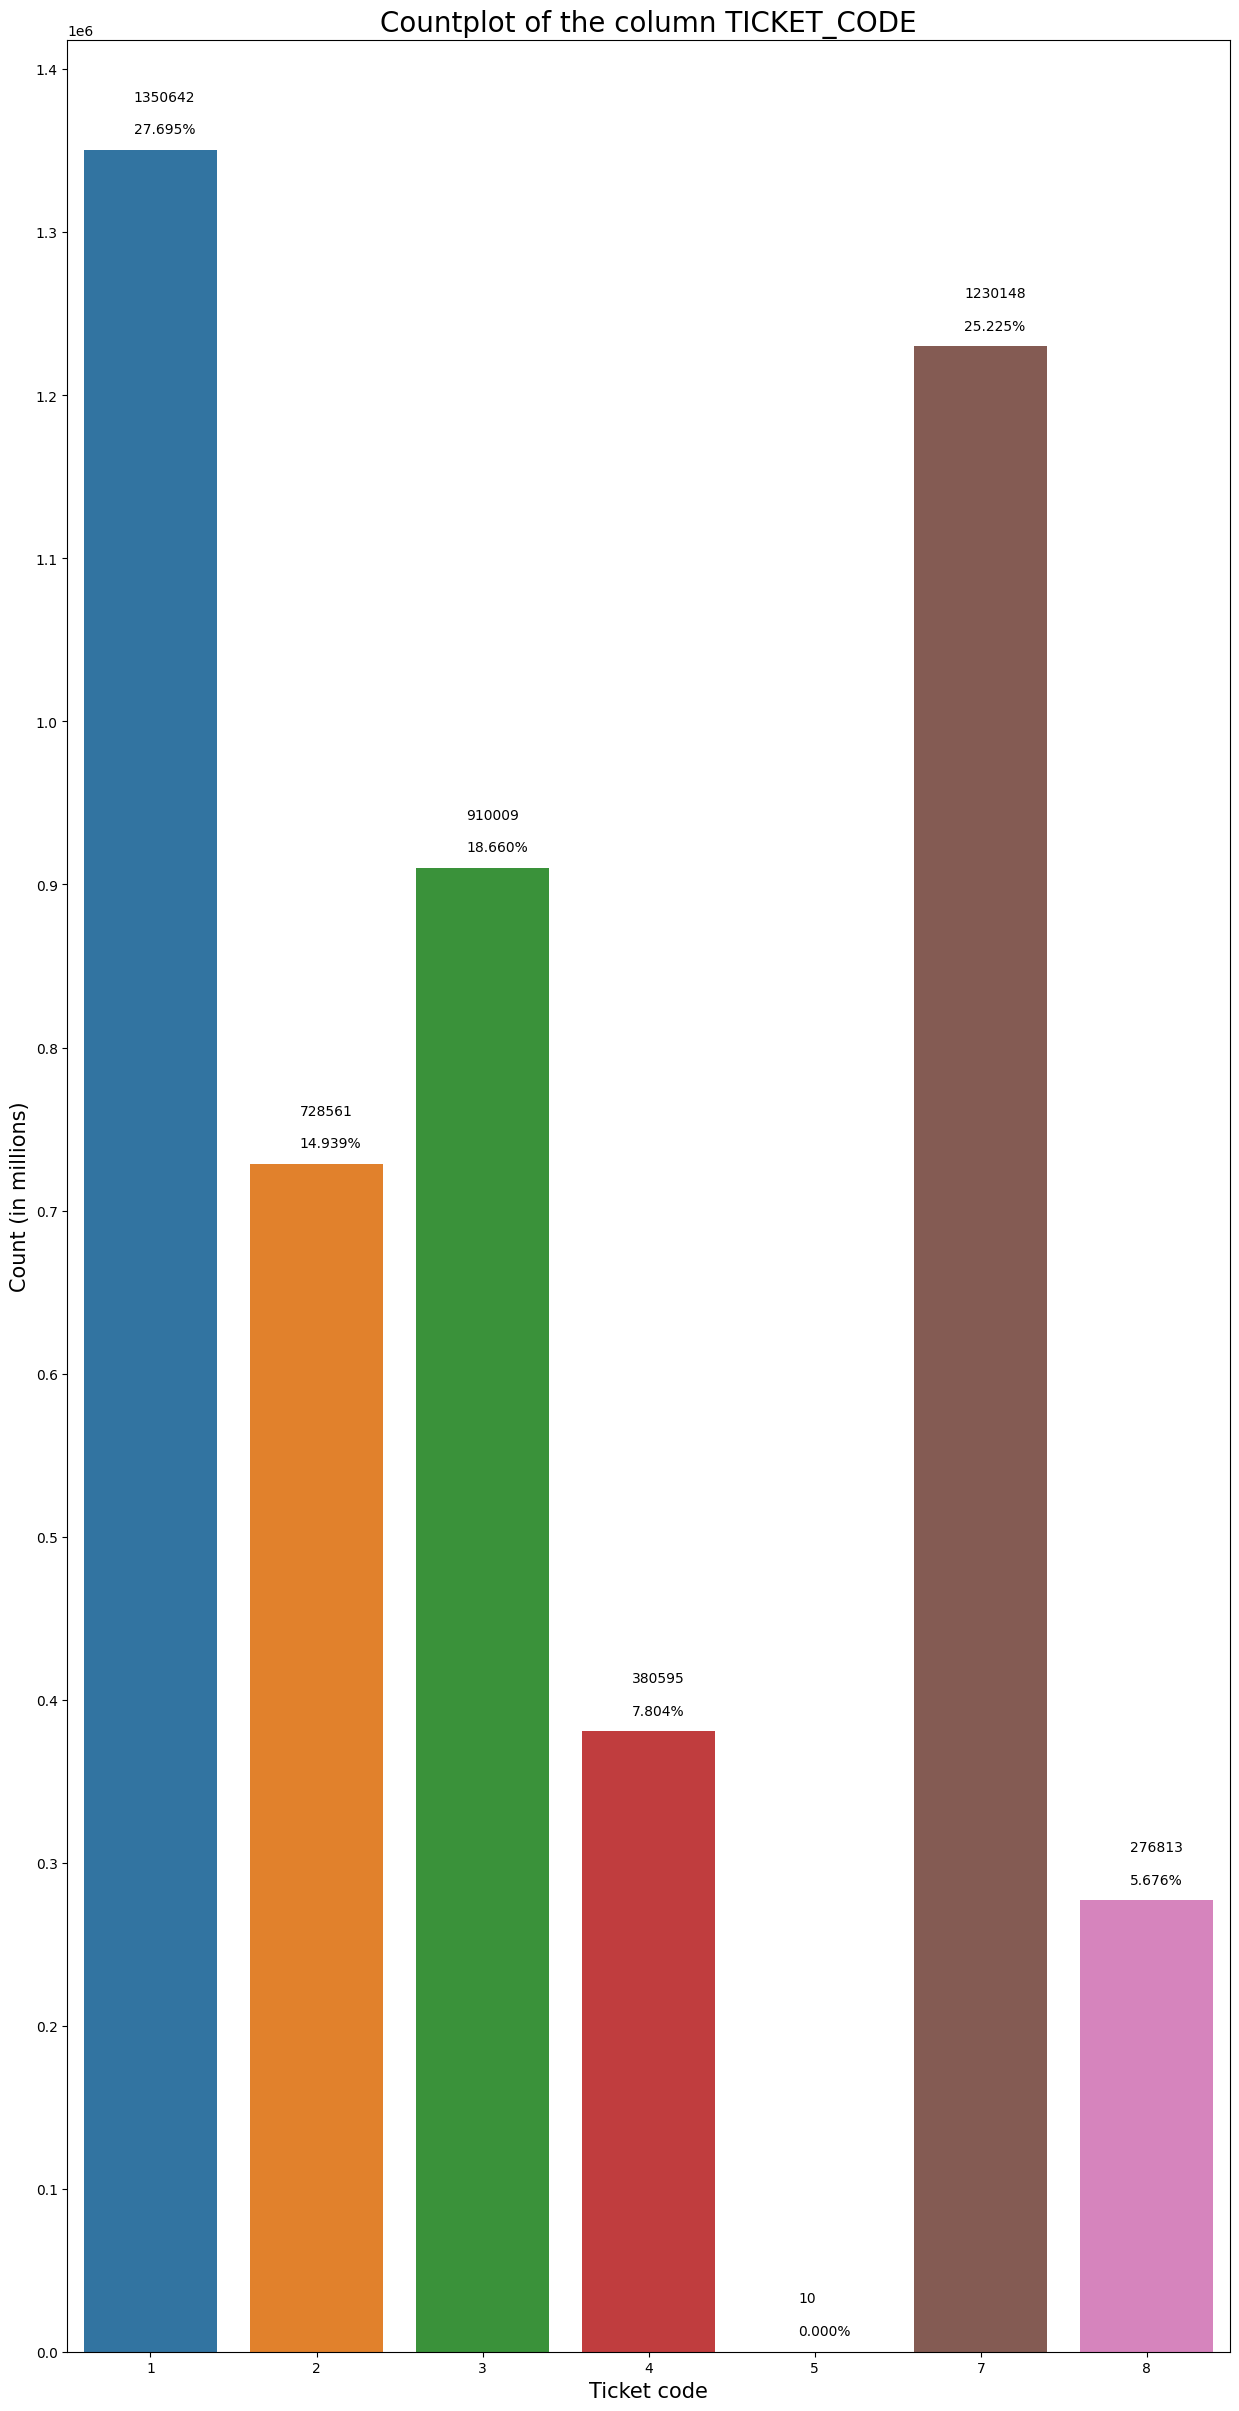

In [397]:
# Countplot of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(15,8))
# Countplot of the column 'TICKET_CODE'
sns.countplot(x='TICKET_CODE', data=df, order=df['TICKET_CODE'].value_counts().sort_index().index)
plt.title('Countplot of the column TICKET_CODE', fontsize=20)
plt.xlabel('Ticket code', fontsize=15)
plt.ylabel('Count (in millions)', fontsize=15)

# Change yticks to have a better visualization
scale = np.arange(0, max(df['TICKET_CODE'].value_counts())+100000, 100000)
plt.yticks(scale)

# Add the percentage of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.3, p.get_height()+10000))

# Add the count of each category on top of the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+30000))

# Add a padding on the top of the plot
plt.subplots_adjust(top=3)

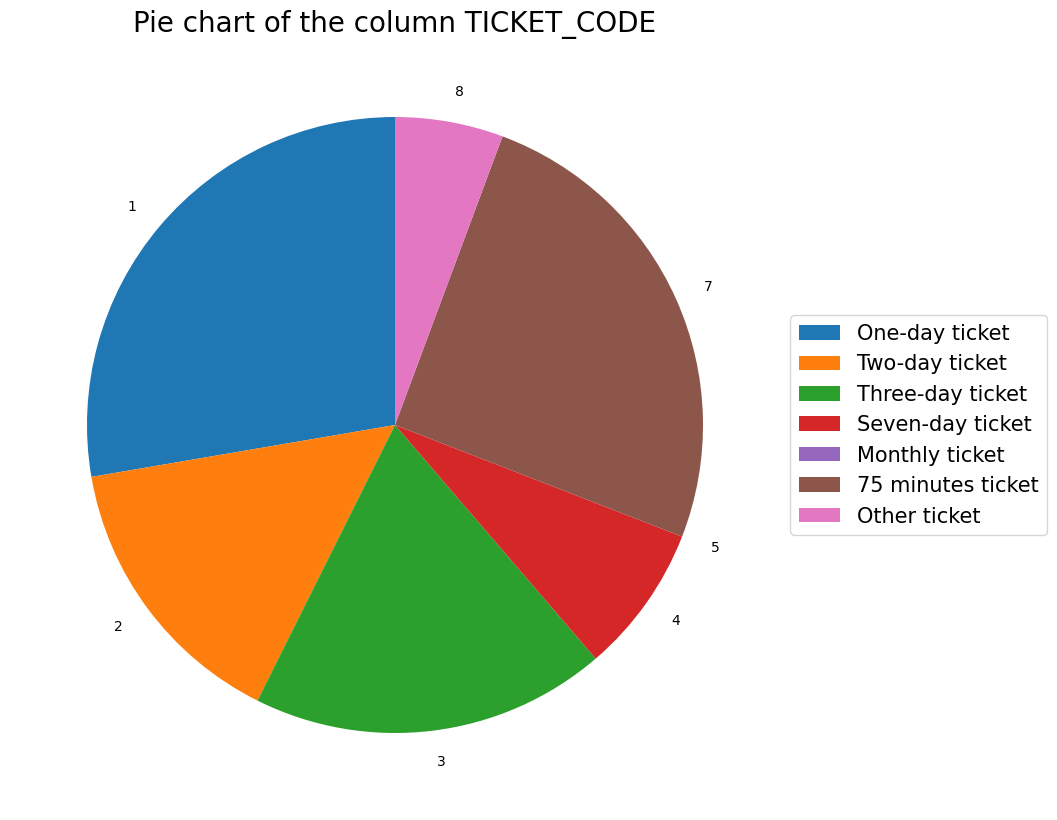

In [398]:
# Plot a pie chart of the column 'TICKET_CODE'
fig, ax = plt.subplots(figsize=(20,10))
df['TICKET_CODE'].value_counts().sort_index().plot.pie(startangle=90)

# Add the name of the ticket profile on the pie chart
plt.legend(labels=df['TICKET_CODE'].value_counts().sort_index().rename(dict_tickets).index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=15)

plt.title('Pie chart of the column TICKET_CODE', fontsize=20)
plt.ylabel('')
fig.patch.set_facecolor('white')
plt.show()

#### Delete the validation that are with TICKET_CODE = 8 (other tickets) 

In [399]:
shape_before = df.shape[0]

# Delete 8 tickets because they are not useful for the analysis 
df = df[df['TICKET_CODE'] != '8']

# Print the number of rows before and after the deletion of the 8 tickets and the difference
print('The number of rows before the deletion of the 8 tickets is: {}'.format(shape_before))
print('The number of rows after the deletion of the 8 tickets is: {}'.format(df.shape[0]))
print('The difference is: {}'.format(shape_before - df.shape[0]))

# TODO: to de-comment later

The number of rows before the deletion of the 8 tickets is: 4876778
The number of rows after the deletion of the 8 tickets is: 4599965
The difference is: 276813


## Data Cleaning

### Similar stops

In [400]:
# Print the number of unique values in the column 'DESCRIZIONE' that are the names of the stops
print('The number of unique values in the column DESCRIZIONE is: {}'.format(df['DESCRIZIONE'].nunique()))

The number of unique values in the column DESCRIZIONE is: 568


In [401]:
def get_common_prefix(string_list):
    """
        This function returns the common prefix of a list of strings.
        If there is no common prefix, it returns an empty string.
        :param string_list: list of strings
        :return: string that is the common prefix of the list of strings
    """
    first_prefix = string_list[0].split(" ")[0]
    # Create and empty dictionary
    prefix_dict = {}

    # Iterate over the list of strings
    for string in string_list[1:]:
        # Check if the string starts with the first prefix
        if not string.startswith(first_prefix):
            # If the string does not start with the first prefix, split the string and take the first word
            first_prefix = string.split(" ")[0]
            if string.startswith(first_prefix):
                # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
                prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
        else:
            # In the dictionary add the new prefix as key and the list of strings that have this prefix as value
            prefix_dict[first_prefix] = [string for string in string_list if string.startswith(first_prefix)]
    return prefix_dict

In [402]:
# To avoid problem regarding the letters in uppercase and lowercase, convert all the letters in uppercase
df['DESCRIZIONE'] = df['DESCRIZIONE'].str.upper()

In [403]:
# Use the function get_common_prefix to find the common prefix of the strings in the column 'DESCRIZIONE' and print the result

# Crete a string list with the unique values of the column 'DESCRIZIONE'
string_list = df['DESCRIZIONE'].unique().tolist()

dict_prefix = get_common_prefix(string_list)
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

# Print the number of keys in the dictionary
print('The number of keys in the dictionary is: {}'.format(len(dict_prefix.keys())))

LIDO: ['LIDO (S.M.E.', 'LIDO S. NICO']
S.: ['S. ZACCARIA ', 'S. MARCUOLA-', "S. TOMA' SX", 'S. MARCO (VA', 'S. ELENA SX', 'S. MARCO (GI', 'S. ANGELO', 'S. MARIA DEL', 'S. SILVESTRO', "S. TOMA' DX", 'S. BASILIO', 'S. ERASMO CH', 'S. ALVISE', 'S. GIORGIO', 'S. SAMUELE', 'S. PIETRO DI', 'S. ERASMO CA', 'S. MARTA', 'S. ELENA DX', 'S. ERASMO PU', 'S. SERVOLO']
GIUDECCA: ['GIUDECCA PAL']
P.LE: ['P.LE ROMA (S', 'P.LE ROMA (P']
CORSIA: ['CORSIA A1', 'CORSIA A5', 'CORSIA A4', 'CORSIA A2', 'CORSIA C', 'CORSIA A6', 'CORSIA B7', 'CORSIA A3', 'CORSIA A8', 'CORSIA B5', 'CORSIA B1', 'CORSIA A7', 'CORSIA B4', 'CORSIA B3']
F.TE: ['F.TE NOVE "C', 'F.TE NOVE "A', 'F.TE NOVE "B', 'F.TE NOVE "D']
RIALTO: ['RIALTO "D"', 'RIALTO MERCA', 'RIALTO "B"', 'RIALTO "C"', 'RIALTO "A"']
BURANO: ['BURANO SX PE', 'BURANO DX PE']
ZATTERE: ['ZATTERE SX', 'ZATTERE DX']
CA': ["CA' D'ORO", "CA' REZZONIC", "CA' ROSSA", "CA' SABBIONI", "CA' SOLARO", "CA' SAGREDO", "CA' ALVERA'", "CA' LIN", "CA' BADOERA", "CA' LONGO", "CA' TRO

#### Update some keys in the dictionary

In [404]:
# Rename the key 'P.le' with 'P.le Roma'
dict_prefix['P.LE ROMA'] = dict_prefix.pop('P.LE')
# Rename the key 'F.TE' with 'F.TE NOVE'
dict_prefix['F.TE NOVE'] = dict_prefix.pop('F.TE')

In [405]:
# Print the values of the dictionary with the keys 'S.' and 'San'
print('The values of the dictionary with the key S. are: {}'.format(dict_prefix['S.']))
print('The values of the dictionary with the key San are: {}'.format(dict_prefix['SAN']))

The values of the dictionary with the key S. are: ['S. ZACCARIA ', 'S. MARCUOLA-', "S. TOMA' SX", 'S. MARCO (VA', 'S. ELENA SX', 'S. MARCO (GI', 'S. ANGELO', 'S. MARIA DEL', 'S. SILVESTRO', "S. TOMA' DX", 'S. BASILIO', 'S. ERASMO CH', 'S. ALVISE', 'S. GIORGIO', 'S. SAMUELE', 'S. PIETRO DI', 'S. ERASMO CA', 'S. MARTA', 'S. ELENA DX', 'S. ERASMO PU', 'S. SERVOLO']
The values of the dictionary with the key San are: ['SANTA CHIARA', 'SANSOVINO', 'SAN STAE', "SAN DONA'", 'SAN GIULIANO', "SAN NICOLO'", 'SAN GIORGIO', 'SAN MARCO', 'SAN PIETRO', 'SANTA MARIA ', 'SAN GIUSEPPE', 'SAN LIBERALE', 'SAN CAMILLO', "SANT'ANTONIO", 'SANTA LUCIA', "SANT' ANTONI", 'SAN PIETRO I', 'SAN ZENO', 'SANTO STEFAN', 'SANREMO', 'SAN VIO']


##### S.Erasmo

In [406]:
# Create a new key in the dictionary with the key S.ERASMO; insert as value the list of strings that have the prefix 'S.ERASMO'
dict_prefix['S.ERASMO'] = [string for string in dict_prefix['S.'] if string.startswith('S.ERASMO')]

# Add the value 'S. Erasmo Pu' originally in the key 'San' to the key 'S.ERASMO'
dict_prefix['S.ERASMO'].append('S. ERASMO PU')

# Remove the strings that have the prefix 'S.ERASMO' from the keys 'S.' and 'San'
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S.ERASMO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. ERASMO PU')]

# Print the values of the dictionary with the key 'S.ERASMO'
print('The values of the dictionary with the key S.ERASMO are: {}'.format(dict_prefix['S.ERASMO']))

The values of the dictionary with the key S.ERASMO are: ['S. ERASMO PU']


##### San Marco

In [407]:
# Create a new key in the dictionary with the key 'San Marco'; insert as value the list of strings that have the prefix 'San Marco'
dict_prefix['SAN MARCO'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN MARCO')]


# Add the value S. MARCO (Gi', 'S. Pietro in Gu') originally in the key 'S.' to the key 'San Marco'
dict_prefix['SAN MARCO'].append('S. MARCO (GI')

# Remove the strings that have the prefix 'San Marco' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN MARCO')]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if not string.startswith('S. MARCO (GI')]

# Print the values of the dictionary with the key 'San Marco'
print('The values of the dictionary with the key San Marco are: {}'.format(dict_prefix['SAN MARCO']))

The values of the dictionary with the key San Marco are: ['SAN MARCO', 'S. MARCO (GI']


##### San Dona'

In [408]:
# Create a new key in the dictionary with the key 'San Dona'; insert as value the list of strings that have the prefix 'San Dona'
dict_prefix['SAN DONA'] = [string for string in dict_prefix['SAN'] if string.startswith('SAN DONA')]

# Remove the strings that have the prefix 'San Dona' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if not string.startswith('SAN DONA')]

# Print the values of the dictionary with the key 'San Dona'
print('The values of the dictionary with the key San Dona are: {}'.format(dict_prefix['SAN DONA']))

The values of the dictionary with the key San Dona are: ["SAN DONA'"]


#### San Pietro

In [409]:
# Create a new key in the dictionary with the key 'San Pietro'; insert as value the list of strings that have the word 'Pietro' in the string
dict_prefix['SAN PIETRO'] = [string for string in dict_prefix['SAN'] if 'PIETRO' in string] + [string for string in dict_prefix['S.'] if 'PIETRO' in string]

# Remove the strings that have the word 'Pietro' from the keys 'S.' and 'San'
dict_prefix['SAN'] = [string for string in dict_prefix['SAN'] if 'PIETRO' not in string]
dict_prefix['S.'] = [string for string in dict_prefix['S.'] if 'PIETRO' not in string]

# Print the values of the dictionary with the key 'San Pietro'
print('The values of the dictionary with the key San Pietro are: {}'.format(dict_prefix['SAN PIETRO']))

The values of the dictionary with the key San Pietro are: ['SAN PIETRO', 'SAN PIETRO I', 'S. PIETRO DI']


#### Ca' Rossa

In [410]:
# Create a new key in the dictionary with the key 'Ca' Rossa'; insert as value the list of strings that have the word 'Ca' Rossa' in the string
dict_prefix['CA\' ROSSA'] = [string for string in dict_prefix['CA\''] if 'CA' in string and 'ROSSA' in string]

# Remove the strings that have the word 'Ca' Rossa' from the keys 'Ca''
dict_prefix['CA\''] = [string for string in dict_prefix['CA\''] if 'CA' not in string or 'ROSSA' not in string]

# Print the values of the dictionary with the key 'Ca Rossa'
print('The values of the dictionary with the key Ca\' Rossa are: {}'.format(dict_prefix['CA\' ROSSA']))

The values of the dictionary with the key Ca' Rossa are: ["CA' ROSSA"]


##### Manage the remaining values in the keys 'S.' and 'San' and others

In [411]:
# Manage the remaining values in the keys 'S.', 'San', 'Santa', 'Sant'', 'Ca'', 'Piazza', 'Piazzale', 'Stazione', 'Treviso, 'Trento', 'Incr.'
# Create a new key for each value in the keys as above and assign the value as value of the new key
# Remove the values from the keys as above

if 'S.' in dict_prefix:
    for value in dict_prefix['S.']:
        dict_prefix[value] = [value]
    dict_prefix.pop('S.')

if 'SAN' in dict_prefix:
    for value in dict_prefix['SAN']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SAN')

if 'SANTA' in dict_prefix:
    for value in dict_prefix['SANTA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SANTA')

if 'SANT\'' in dict_prefix:
    for value in dict_prefix['SANT\'']:
        dict_prefix[value] = [value]
    dict_prefix.pop('SANT\'')

if 'CA\'' in dict_prefix:
    for value in dict_prefix['CA\'']:
        dict_prefix[value] = [value]
    dict_prefix.pop('CA\'')

if 'PIAZZA' in dict_prefix:
    for value in dict_prefix['PIAZZA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('PIAZZA')

if 'PIAZZALE' in dict_prefix:
    for value in dict_prefix['PIAZZALE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('PIAZZALE')

if 'VIA' in dict_prefix:
    for value in dict_prefix['VIA']:
        dict_prefix[value] = [value]
    dict_prefix.pop('VIA')

if 'STAZIONE' in dict_prefix:
    for value in dict_prefix['STAZIONE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('STAZIONE')

if 'TREVISO' in dict_prefix:
    for value in dict_prefix['TREVISO']:
        dict_prefix[value] = [value]
    dict_prefix.pop('TREVISO')

if 'TRENTO' in dict_prefix:
    for value in dict_prefix['TRENTO']:
        dict_prefix[value] = [value]
    dict_prefix.pop('TRENTO')

if 'INCR.' in dict_prefix:
    for value in dict_prefix['INCR.']:
        dict_prefix[value] = [value]
    dict_prefix.pop('INCR.')

if 'DE' in dict_prefix:
    for value in dict_prefix['DE']:
        dict_prefix[value] = [value]
    dict_prefix.pop('DE')

#### Treviso and Trento

In [412]:
# Remove the values Treviso, Trento, Trezzo and Treporti from the key 'Tre'
dict_prefix['TRE'] = [string for string in dict_prefix['TRE'] if 'TREVISO' not in string and 'TRENTO' not in string and 'TREZZO' not in string and 'TREPORTI' not in string]

# Print the values of the dictionary with the key 'Tre'
print('The values of the dictionary with the key Tre are: {}'.format(dict_prefix['TRE']))

# TODO: Correct the values of the keys 'Treviso' and 'Trento' with the correct values

The values of the dictionary with the key Tre are: ['TRE ARCHI']


#### Keys with only an item

In [413]:
# If a key as only one value, then rename the key with the value
# Use copy() to avoid RuntimeError: dictionary changed size during iteration
for key, value in dict_prefix.copy().items():
    if len(value) == 1:
        dict_prefix[value[0]] = dict_prefix.pop(key)

##### Finally, the update dictionary is

In [414]:
# Print the dictionary in the new format
for key, value in dict_prefix.items():
    print('{}: {}'.format(key, value))

LIDO: ['LIDO (S.M.E.', 'LIDO S. NICO']
CORSIA: ['CORSIA A1', 'CORSIA A5', 'CORSIA A4', 'CORSIA A2', 'CORSIA C', 'CORSIA A6', 'CORSIA B7', 'CORSIA A3', 'CORSIA A8', 'CORSIA B5', 'CORSIA B1', 'CORSIA A7', 'CORSIA B4', 'CORSIA B3']
RIALTO: ['RIALTO "D"', 'RIALTO MERCA', 'RIALTO "B"', 'RIALTO "C"', 'RIALTO "A"']
BURANO: ['BURANO SX PE', 'BURANO DX PE']
ZATTERE: ['ZATTERE SX', 'ZATTERE DX']
ACCADEMIA: ['ACCADEMIA SX', 'ACCADEMIA DX']
ARSENALE: ['ARSENALE SX', 'ARSENALE DX']
FERROVIA: ['FERROVIA "B"', 'FERROVIA "E"', 'FERROVIA "D"', 'FERROVIA "C"', 'FERROVIA "A"', 'FERROVIA']
MESTRE: ['MESTRE VIA M', 'MESTRE CENTR', 'MESTRE FS C4', 'MESTRE RAMPA', 'MESTRE FS C3', 'MESTRE VIA T', 'MESTRE FS C2', 'MESTRE PIAZZ', 'MESTRE VIA A', 'MESTRE VIA P', 'MESTRE VIA H', 'MESTRE FS C5', 'MESTRE FS C1']
CHIOGGIA: ['CHIOGGIA P.T', 'CHIOGGIA FS', 'CHIOGGIA CAM']
SME: ['SME 1', 'SME 3', 'SME 2', 'SME 4', 'SME 5']
TRONCHETTO: ["TRONCHETTO '", 'TRONCHETTO N', 'TRONCHETTO (']
PORTO: ['PORTO MARGHE', 'PORTO SECCO

In [415]:
# Export the dictionary in a json file
name_file = 'dict_prefix_' + file_name.split('.')[0] + '.json'
with open('data/dictionaries/' + name_file, 'w') as fp:
    json.dump(dict_prefix, fp)

### Useless stamps

In [416]:
# TODO: #1 Remove useless rows that have a minimum temporal gap for the same serial and fermata
# DE-COMMENT THE FOLLOWING LINES OF CODE

In [417]:
# Find the serial with the hightest number of validations, and the same for each ticket profile, save the results in a dictionary
dict_serial = {}
for ticket in df['TICKET_CODE'].unique():
    dict_serial[ticket] = df[df['TICKET_CODE'] == ticket]['SERIALE'].value_counts().index[0]

# Print the serial with the hightest number of validations, and the same for each ticket profile
for ticket in df['TICKET_CODE'].unique():
  print('The serial with the hightest number of validations for the ticket profile {} is: {}'.format(ticket, dict_serial[ticket]))

The serial with the hightest number of validations for the ticket profile 7 is: 36411815402286852
The serial with the hightest number of validations for the ticket profile 3 is: 65676556459474437
The serial with the hightest number of validations for the ticket profile 2 is: 36127712973070852
The serial with the hightest number of validations for the ticket profile 1 is: 65676349204230405
The serial with the hightest number of validations for the ticket profile 4 is: 36407618283051780
The serial with the hightest number of validations for the ticket profile 5 is: 65676209520080389


In [418]:
# Group by the serial and the fermata 
# df = df.groupby(['SERIALE', 'FERMATA']).apply(lambda x: x.sort_values(by='DATA_VALIDAZIONE', ascending=True))

# Print the first 5 rows of the df
# df.head()
# DO NOT DE-COMMENT THIS CELL

In [419]:
# Reset the index of the df and drop the old index in order to have a new index starting from 0 to the number of rows
# It is necessary to have a new index because the groupby function has created a multi-index
df.reset_index(drop=True, inplace=True)

In [420]:
# Create a new column 'MIN_TEMPORAL_GAP' that contains the minimum temporal gap between two validations for the same serial and fermata in minutes
df = df.groupby(['SERIALE','DATA', 'DESCRIZIONE']).apply(lambda x: x.assign(MIN_TEMPORAL_GAP = x['DATA_VALIDAZIONE'].diff().dt.total_seconds()/60))

KeyboardInterrupt: 

In [ ]:
df.head(20)

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO,MIN_TEMPORAL_GAP
0,2023-04-04,00:00:00,2023-04-04 00:00:00,-2854957894,5032,"FERROVIA ""B""",11209,7,BIGL RETE UNICA 75',NaN
1,2023-04-04,00:00:00,2023-04-04 00:00:00,-2854992707,5032,"FERROVIA ""B""",23101,5,MENSILE ORDINARIO RETE UNICA,NaN
2,2023-04-04,00:00:00,2023-04-04 00:00:00,-2821778289,5022,GIUDECCA PAL,23101,5,MENSILE ORDINARIO RETE UNICA,NaN
3,2023-04-04,00:00:00,2023-04-04 00:00:00,-3613120484,5028,"P.LE ROMA ""E",23301,5-STUD,MENS.STUDENTE RETE UNICA,NaN
4,2023-04-04,00:00:00,2023-04-04 00:00:00,-3604951458,5028,"P.LE ROMA ""E",23301,5-STUD,MENS.STUDENTE RETE UNICA,NaN
5,2023-04-04,00:00:00,2023-04-04 00:00:00,-3604568831,5031,"P.LE ROMA ""G",23101,5,MENSILE ORDINARIO RETE UNICA,NaN
6,2023-04-04,00:01:00,2023-04-04 00:01:00,-3613116993,5031,"P.LE ROMA ""G",23102,6,ANNUALE ORDINARIO RETE UNICA,NaN
7,2023-04-04,00:01:00,2023-04-04 00:01:00,-2824299557,3625,AEROPORTO MA,11209,7,BIGL RETE UNICA 75',NaN
8,2023-04-04,00:01:00,2023-04-04 00:01:00,-3613054156,5013,S. MARCO-SAN,23102,6,ANNUALE ORDINARIO RETE UNICA,NaN
9,2023-04-04,00:01:00,2023-04-04 00:01:00,-2824247296,5001,LIDO S.M.E.,23301,5-STUD,MENS.STUDENTE RETE UNICA,NaN


In [ ]:
df.tail(20)

,DATA,ORA,DATA_VALIDAZIONE,SERIALE,FERMATA,DESCRIZIONE,TITOLO,TICKET_CODE,DESCRIZIONE_TITOLO,MIN_TEMPORAL_GAP
806743,2023-04-09,16:37:00,2023-04-09 16:37:00,40554832520317188,5011,SAN MARCO-SA,11261,1,"DAILYP-TPL19,90-C.VE5,10",283.0
806744,2023-04-09,16:37:00,2023-04-09 16:37:00,40554832520317444,5011,SAN MARCO-SA,11261,1,"DAILYP-TPL19,90-C.VE5,10",284.0
806745,2023-04-09,16:37:00,2023-04-09 16:37:00,40554832520317700,5011,SAN MARCO-SA,11261,1,"DAILYP-TPL19,90-C.VE5,10",283.0
806746,2023-04-09,16:37:00,2023-04-09 16:37:00,41960996623881732,7777,PEOPLE MOVER,11151,7,PEOPLEMOVER+BUS+TRAM 75',NaN
806747,2023-04-09,16:37:00,2023-04-09 16:37:00,40553621743869700,7777,PEOPLE MOVER,11151,7,PEOPLEMOVER+BUS+TRAM 75',NaN
806748,2023-04-09,16:37:00,2023-04-09 16:37:00,40553621743869956,7777,PEOPLE MOVER,11151,7,PEOPLEMOVER+BUS+TRAM 75',NaN
806749,2023-04-09,16:37:00,2023-04-09 16:37:00,40553621743805188,7777,PEOPLE MOVER,11151,7,PEOPLEMOVER+BUS+TRAM 75',NaN
806750,2023-04-09,16:37:00,2023-04-09 16:37:00,-3604994797,5032,"FERROVIA ""B""",23301,5-STUD,MENS.STUDENTE RETE UNICA,NaN
806751,2023-04-09,16:37:00,2023-04-09 16:37:00,65694454701587717,5113,"BURANO ""C""",11101,7,"75'-TPL 8,64-COMVE0,86",NaN
806752,2023-04-09,16:37:00,2023-04-09 16:37:00,65694454705451781,5113,"BURANO ""C""",11101,7,"75'-TPL 8,64-COMVE0,86",NaN


In [ ]:
df['MIN_TEMPORAL_GAP'].value_counts()

0.0       15804
1.0        4717
2.0        3002
3.0        1876
4.0        1293
5.0         967
6.0         791
7.0         646
8.0         558
9.0         468
10.0        408
11.0        312
12.0        305
13.0        256
14.0        186
15.0        171
16.0        137
20.0        131
18.0        117
19.0        112
17.0        110
21.0        102
22.0         82
23.0         80
296.0        79
27.0         71
26.0         70
24.0         69
359.0        64
25.0         64
241.0        62
30.0         59
181.0        59
260.0        57
498.0        57
176.0        57
390.0        57
436.0        57
389.0        56
161.0        54
360.0        54
261.0        54
309.0        54
420.0        53
529.0        52
29.0         52
203.0        51
500.0        51
239.0        50
210.0        50
398.0        50
222.0        50
272.0        49
31.0         49
372.0        49
374.0        49
243.0        49
338.0        49
314.0        49
396.0        48
333.0        48
435.0        48
221.0   

In [ ]:
# How many rows have a minimum temporal gap equal to NaN?
df[df['MIN_TEMPORAL_GAP'].isna()].shape[0]

754299

In [ ]:
# Cleaning operation: remove the rows using the minimum temporal gap

# Find a reasonable delta of MIN_TEMPORAL_GAP to remove the rows that have a minimum temporal gap for the same serial and fermata less than this delta
# Print the minimum value of the column MIN_TEMPORAL_GAP
print('The minimum value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].min()))

# Print the maximum value of the column MIN_TEMPORAL_GAP
print('The maximum value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].max()))

# Print the mean value of the column MIN_TEMPORAL_GAP
print('The mean value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].mean()))

# Print the median value of the column MIN_TEMPORAL_GAP
print('The median value of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].median()))

# Print the standard deviation of the column MIN_TEMPORAL_GAP
print('The standard deviation of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].std()))

# Print the 0.05th percentile of the column MIN_TEMPORAL_GAP
print('The 0.05th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.05)))

# Print the 0.10th percentile of the column MIN_TEMPORAL_GAP
print('The 0.10th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.10)))

# Print the 25th percentile of the column MIN_TEMPORAL_GAP
print('The 25th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.25)))

# Print the 75th percentile of the column MIN_TEMPORAL_GAP
print('The 75th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.75)))

# Print the 90th percentile of the column MIN_TEMPORAL_GAP
print('The 90th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.90)))

# Print the 95th percentile of the column MIN_TEMPORAL_GAP
print('The 95th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.95)))

# Print the 99th percentile of the column MIN_TEMPORAL_GAP
print('The 99th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.99)))

# Print the 99.9th percentile of the column MIN_TEMPORAL_GAP
print('The 99.9th percentile of the column MIN_TEMPORAL_GAP is: {}'.format(df['MIN_TEMPORAL_GAP'].quantile(0.999)))

# Decide the delta of MIN_TEMPORAL_GAP to remove the rows that have a minimum temporal gap for the same serial and fermata less than this delta
delta = df['MIN_TEMPORAL_GAP'].quantile(0.1)
if delta == 0:
    delta = df['MIN_TEMPORAL_GAP'].quantile(0.25)
if delta == 0:
    delta = df['MIN_TEMPORAL_GAP'].median()
print('The delta of MIN_TEMPORAL_GAP is: {}'.format(delta))

The minimum value of the column MIN_TEMPORAL_GAP is: 0.0
The maximum value of the column MIN_TEMPORAL_GAP is: 1432.0
The mean value of the column MIN_TEMPORAL_GAP is: 128.6828491918268
The median value of the column MIN_TEMPORAL_GAP is: 4.0
The standard deviation of the column MIN_TEMPORAL_GAP is: 198.5131599567485
The 0.05th percentile of the column MIN_TEMPORAL_GAP is: 0.0
The 0.10th percentile of the column MIN_TEMPORAL_GAP is: 0.0
The 25th percentile of the column MIN_TEMPORAL_GAP is: 0.0
The 75th percentile of the column MIN_TEMPORAL_GAP is: 240.0
The 90th percentile of the column MIN_TEMPORAL_GAP is: 458.0
The 95th percentile of the column MIN_TEMPORAL_GAP is: 549.0
The 99th percentile of the column MIN_TEMPORAL_GAP is: 700.0
The 99.9th percentile of the column MIN_TEMPORAL_GAP is: 1013.5370000000039
The delta of MIN_TEMPORAL_GAP is: 4.0


In [ ]:
# Cleaning operation: remove the rows using the minimum temporal gap

# Save the number of rows before the cleaning operation
shape_before = df.shape[0]

# Delete the rows that have a minimum temporal gap for the same serial and fermata more than the delta calculated before.
# Do not remove the rows with NaN values because they are the first validations of the day of a specific serial and fermata usefull for the analysis
df = df[(df['MIN_TEMPORAL_GAP'] > delta) | (df['MIN_TEMPORAL_GAP'].isna())]

# Print the number of rows before and after the cleaning operation and the difference
print('The number of rows before the cleaning operation is: {}'.format(shape_before))
print('The number of rows after the cleaning operation is: {}'.format(df.shape[0]))
print('The difference is: {}'.format(shape_before - df.shape[0]))
# Calculate the percentage of rows that has just been deleted
print('The percentage of rows that has just been deleted is: {}%'.format(round((shape_before - df.shape[0])/shape_before*100, 2)))

The number of rows before the cleaning operation is: 806763
The number of rows after the cleaning operation is: 780071
The difference is: 26692
The percentage of rows that has just been deleted is: 3.31%


In [ ]:
# Delete the column MIN_TEMPORAL_GAP because it is not useful anymore
df.drop('MIN_TEMPORAL_GAP', axis=1, inplace=True)

In [ ]:
# Create a new dataframe, copied from the original one
df_new = df.copy() 

# Update the column 'DESCRIZIONE' of the new df with the new values of the dictionary: 
# the value that are present in the dataframe are the values of the dictionary; you have to sobstitute with the key of the dictionary
for key, value in dict_prefix.items():
    df_new['DESCRIZIONE'] = df_new['DESCRIZIONE'].replace(value, key)


# Print the head of the new dataframe
print(df_new.head())

# Export the new dataframe in a txt file
# The name of the file is dataset_cleaned followed by the name (file_name variable) of the file that has been cleaned with txt extension
name_file = 'dataset_cleaned_' + file_name.split('.')[0] + '.txt'
df_new.to_csv('data/processed/' + name_file, sep='\t', index=False)

print('The script has finished')

        DATA       ORA DATA_VALIDAZIONE     SERIALE  FERMATA   DESCRIZIONE  \
0 2023-04-04  00:00:00       2023-04-04 -2854957894     5032      FERROVIA   
1 2023-04-04  00:00:00       2023-04-04 -2854992707     5032      FERROVIA   
2 2023-04-04  00:00:00       2023-04-04 -2821778289     5022  GIUDECCA PAL   
3 2023-04-04  00:00:00       2023-04-04 -3613120484     5028     P.LE ROMA   
4 2023-04-04  00:00:00       2023-04-04 -3604951458     5028     P.LE ROMA   

   TITOLO TICKET_CODE            DESCRIZIONE_TITOLO  
0   11209           7           BIGL RETE UNICA 75'  
1   23101           5  MENSILE ORDINARIO RETE UNICA  
2   23101           5  MENSILE ORDINARIO RETE UNICA  
3   23301      5-STUD      MENS.STUDENTE RETE UNICA  
4   23301      5-STUD      MENS.STUDENTE RETE UNICA  
The script has finished
